In [1]:
import torch,os
from torchvision.transforms import ToPILImage, ToTensor, Grayscale
from PIL import Image
import numpy as np

In [1]:
from diffusers import AutoencoderKL, StableDiffusionPipeline

In [7]:
len(os.listdir('/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/data/vae_train_images/LabeledImage'))

1828

In [8]:
len(os.listdir('/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/data/vae_train_images/UnlabeledImage'))

25351

In [9]:
len(os.listdir('/bask/projects/c/chenhp-data-gen/yifansun/project/lidm_test/Data/ACDC/diffusion/flux_vae/Images'))

16188

find $(cd data/vae_train_images/UnlabeledImage && pwd) -type f | shuf > tmp.txt
head -n -20000 tmp.txt > data/vae_train_images/train.txt
tail -n 5351 tmp.txt > data/vae_train_images/val.txt
rm tmp.txt

In [14]:
img = Image.open('/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/data/vae_train_images/LabeledImage/patient001_frame01_1.png')
totensor = ToTensor()
gray = Grayscale(num_output_channels=3)
img_tensor = gray(img)



In [15]:
img_tensor = totensor(img_tensor)
img_tensor.shape

torch.Size([3, 96, 96])

In [4]:
img_tensor

tensor([[[0.0549, 0.0549, 0.0588,  ..., 0.1294, 0.1137, 0.0902],
         [0.0667, 0.0706, 0.0745,  ..., 0.0745, 0.0745, 0.0784],
         [0.0627, 0.0510, 0.0471,  ..., 0.0824, 0.0941, 0.0902],
         ...,
         [0.0157, 0.0196, 0.0196,  ..., 0.3137, 0.2941, 0.2471],
         [0.0157, 0.0314, 0.0314,  ..., 0.3176, 0.3098, 0.2627],
         [0.1020, 0.0392, 0.0510,  ..., 0.3137, 0.3137, 0.2980]]])

In [2]:
for i in (os.listdir('/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/data/vae_train_images/UnlabeledImage')):
    img = Image.open('/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/data/vae_train_images/UnlabeledImage/'+i)
    totensor = ToTensor()
    img_tensor = totensor(img)
    if img_tensor.shape != torch.Size([1, 96, 96]):
        print(i)
        print(img_tensor.shape)
       

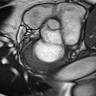

In [5]:
import torch,diffusers
from diffusers import AutoencoderKL, StableDiffusionPipeline
import os
from PIL import Image
import numpy as np

vae = AutoencoderKL.from_pretrained("/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/models/vae")
vae.eval()

# Use the model to encode and decode images
img = Image.open("/bask/projects/c/chenhp-data-gen/yifansun/project/EchoNet-Synthetic/data/vae_train_images/UnlabeledImage/patient-1-frame1.png").convert("L")
display(img)

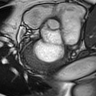

In [6]:
img_array = np.array(img)  # Convert to NumPy array

# Convert to 3-channel image
img_3channel = np.stack([img_array] * 3, axis=-1)
img = torch.from_numpy(img_3channel).permute(2,0,1).unsqueeze(0).to(torch.float32) / 128 - 1

with torch.no_grad():
    lat = vae.encode(img).latent_dist.sample()
    rec = vae.decode(lat).sample
# Display the original and reconstructed images
img = img.squeeze(0).permute(1,2,0)
rec = rec.squeeze(0).permute(1,2,0)
display(Image.fromarray(((img + 1) * 128).to(torch.uint8).numpy()))